## Import the required libraries

In [ ]:
%autosave 60
%lsmagic
%quickref

Autosaving every 60 seconds


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

path_drive='/content/gdrive/MyDrive/Mestrado/ML-IA048-2024S1/T03'

Mounted at /content/gdrive/


## Database: BloodMNIST




### Connect with database

In [ ]:
!pip install medmnist

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached 

In [ ]:
from medmnist import BloodMNIST, INFO, Evaluator

### how to manipulate the deliverable data

In [ ]:
dataset= BloodMNIST(split="test", download=True, size=224)

100%|██████████| 1540731655/1540731655 [00:54<00:00, 28397296.37it/s]


In [ ]:
dataset.info

{'python_class': 'BloodMNIST',
 'description': 'The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.',
 'url': 'https://zenodo.org/records/10519652/files/bloodmnist.npz?download=1',
 'MD5': '7053d0359d879ad8a5505303e11de1dc',
 'url_64': 'https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1',
 'MD5_64': '2b94928a2ae4916078ca51e05b6b800b',
 'url_128': 'https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1',
 'MD5_128': 'adace1e0ed228fccda1f39692059dd4c',
 'url_224': 'https://zenodo.org/records/10519652/files/bloodmnist

In [ ]:
dataset.flag

'bloodmnist'

In [ ]:
## size of dataset, in this case, the option is test
dataset.labels.size

3421

In [ ]:
dataset.available_sizes

[28, 64, 128, 224]

array([[[221, 188, 179],
        [225, 193, 181],
        [232, 201, 182],
        ...,
        [255, 231, 201],
        [255, 231, 201],
        [255, 231, 201]],

       [[218, 186, 176],
        [222, 190, 178],
        [229, 198, 180],
        ...,
        [255, 231, 201],
        [255, 231, 201],
        [255, 231, 201]],

       [[217, 185, 174],
        [220, 188, 176],
        [225, 193, 179],
        ...,
        [255, 231, 201],
        [255, 231, 201],
        [255, 231, 201]],

       ...,

       [[177, 143, 151],
        [176, 141, 150],
        [175, 140, 149],
        ...,
        [255, 232, 198],
        [255, 232, 198],
        [255, 233, 197]],

       [[176, 144, 150],
        [175, 144, 150],
        [174, 143, 149],
        ...,
        [255, 231, 198],
        [255, 233, 197],
        [255, 235, 194]],

       [[179, 146, 153],
        [178, 145, 152],
        [177, 144, 151],
        ...,
        [254, 230, 197],
        [255, 231, 195],
        [255, 232, 194]]], dtype=uint8)
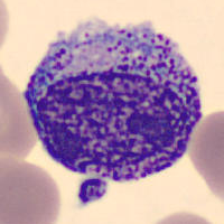

In [ ]:
## the dataset images lists are located in imgs
## and the images could be ilustrated by the index
dataset.imgs[0]

In [ ]:
dataset.as_rgb

False

In [ ]:
dataset.split

'test'

In [ ]:
dataset

Dataset BloodMNIST of size 224 (bloodmnist_224)
    Number of datapoints: 3421
    Root location: /root/.medmnist
    Split: test
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'basophil', '1': 'eosinophil', '2': 'erythroblast', '3': 'immature granulocytes(myelocytes, metamyelocytes and promyelocytes)', '4': 'lymphocyte', '5': 'monocyte', '6': 'neutrophil', '7': 'platelet'}
    Number of samples: {'train': 11959, 'val': 1712, 'test': 3421}
    Description: The BloodMNIST is based on a dataset of individual normal cells, captured from individuals without infection, hematologic or oncologic disease and free of any pharmacologic treatment at the moment of blood collection. It contains a total of 17,092 images and is organized into 8 classes. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images with resolution 3×360×363 pixels are center-cropped into 3×200×200, and then resized into 3×28×28.
    License: C

### Collect specific dataset to train, test and validation

In [ ]:
# distinct labels classifications
dict_classes= {
  '0': 'basophil',
  '1': 'eosinophil',
  '2': 'erythroblast',
  '3': 'immature granulocytes',
  '4': 'lymphocyte',
  '5': 'monocyte',
  '6': 'neutrophil',
  '7': 'platelet'
 }

In [ ]:
size_dimension= 28

data_train= BloodMNIST(split="train", download=True, size=size_dimension)
data_val=   BloodMNIST(split="val", download=True, size=size_dimension)
data_test=  BloodMNIST(split="test", download=True, size=size_dimension)

100%|██████████| 35461855/35461855 [00:02<00:00, 15884928.82it/s]


Using downloaded and verified file: /root/.medmnist/bloodmnist.npz
Using downloaded and verified file: /root/.medmnist/bloodmnist.npz


In [ ]:
## split the datasets
X_train, y_train= data_train.imgs, data_train.labels
X_val, y_val= data_val.imgs, data_val.labels
X_test, y_test= data_test.imgs, data_test.labels

In [ ]:
# Reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], size_dimension, size_dimension, 3)
X_val = X_val.reshape(X_val.shape[0], size_dimension, size_dimension, 3)
X_test = X_test.reshape(X_test.shape[0], size_dimension, size_dimension, 3)

In [ ]:
y_train = y_train.flatten()
y_val = y_val.flatten()
y_test = y_test.flatten()

### Visualizing the actual data

In [ ]:
# y_train.replace(dict_classes)
print(y_train.ravel())
a= [dict_classes[str(i)] for i in y_train.ravel()]
print(a)

[7 3 6 ... 1 6 4]
['platelet', 'immature granulocytes', 'neutrophil', 'neutrophil', 'platelet', 'neutrophil', 'erythroblast', 'erythroblast', 'platelet', 'erythroblast', 'eosinophil', 'eosinophil', 'neutrophil', 'platelet', 'neutrophil', 'immature granulocytes', 'platelet', 'erythroblast', 'neutrophil', 'eosinophil', 'neutrophil', 'eosinophil', 'monocyte', 'monocyte', 'platelet', 'platelet', 'basophil', 'neutrophil', 'lymphocyte', 'monocyte', 'immature granulocytes', 'erythroblast', 'eosinophil', 'eosinophil', 'neutrophil', 'neutrophil', 'eosinophil', 'lymphocyte', 'basophil', 'lymphocyte', 'neutrophil', 'immature granulocytes', 'basophil', 'eosinophil', 'eosinophil', 'monocyte', 'immature granulocytes', 'basophil', 'immature granulocytes', 'monocyte', 'eosinophil', 'platelet', 'lymphocyte', 'lymphocyte', 'eosinophil', 'platelet', 'neutrophil', 'neutrophil', 'erythroblast', 'eosinophil', 'neutrophil', 'lymphocyte', 'lymphocyte', 'immature granulocytes', 'monocyte', 'eosinophil', 'immat

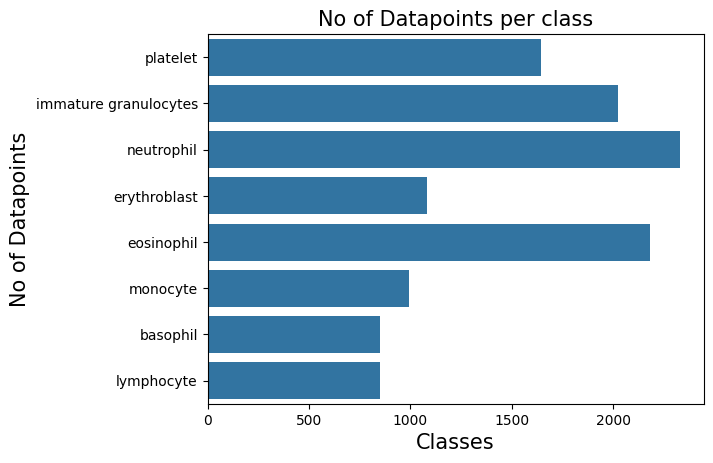

In [ ]:
plt.title('No of Datapoints per class', fontsize=15)
sns.countplot(a)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('No of Datapoints', fontsize=15)
plt.xticks()
plt.savefig(f'{path_drive}/NDatapointsPerClass.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/NDatapointsPerClass.png', format='png', bbox_inches="tight")
plt.show()

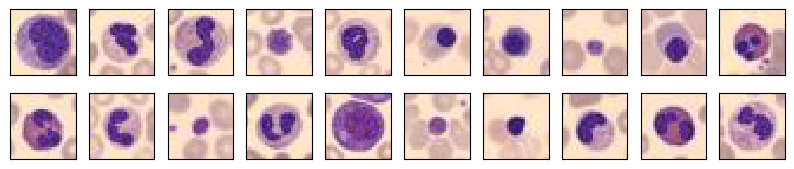

In [ ]:
# Visualization of 25 x 25 original images of digits
fig = plt.figure(figsize=(10, 2))
# plt.title('Original Train Images', fontsize=15)
ind = 1
for i in range(1, 3, 1):
    for j in range(1, 11, 1):
        fig.add_subplot(2, 10, ind)
        plt.imshow(X_train[ind], interpolation = "none")
        plt.xticks([])
        plt.yticks([])
        ind+=1
# plt.set_axis_off()
plt.savefig(f'{path_drive}/fig_train_images.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/fig_train_images.png', format='png', bbox_inches="tight")
plt.show()

### example of data

In [ ]:
X_train[0]

array([[[250, 223, 206],
        [255, 229, 212],
        [251, 222, 206],
        ...,
        [255, 238, 195],
        [251, 230, 185],
        [255, 234, 191]],

       [[255, 229, 210],
        [255, 229, 210],
        [244, 215, 199],
        ...,
        [254, 232, 193],
        [254, 233, 190],
        [255, 242, 201]],

       [[255, 231, 208],
        [255, 227, 205],
        [238, 210, 189],
        ...,
        [255, 233, 202],
        [251, 229, 192],
        [255, 242, 203]],

       ...,

       [[233, 204, 172],
        [239, 210, 180],
        [245, 218, 188],
        ...,
        [255, 225, 199],
        [255, 226, 200],
        [255, 228, 199]],

       [[215, 184, 156],
        [218, 188, 160],
        [228, 198, 170],
        ...,
        [255, 225, 201],
        [254, 227, 200],
        [255, 228, 201]],

       [[217, 182, 162],
        [212, 180, 159],
        [213, 181, 158],
        ...,
        [254, 226, 204],
        [255, 227, 203],
        [255, 228, 201]]], dtype=uint8)

In [ ]:
X_train.shape

(11959, 28, 28, 3)

In [ ]:
X_train[0]

array([[[250, 223, 206],
        [255, 229, 212],
        [251, 222, 206],
        ...,
        [255, 238, 195],
        [251, 230, 185],
        [255, 234, 191]],

       [[255, 229, 210],
        [255, 229, 210],
        [244, 215, 199],
        ...,
        [254, 232, 193],
        [254, 233, 190],
        [255, 242, 201]],

       [[255, 231, 208],
        [255, 227, 205],
        [238, 210, 189],
        ...,
        [255, 233, 202],
        [251, 229, 192],
        [255, 242, 203]],

       ...,

       [[233, 204, 172],
        [239, 210, 180],
        [245, 218, 188],
        ...,
        [255, 225, 199],
        [255, 226, 200],
        [255, 228, 199]],

       [[215, 184, 156],
        [218, 188, 160],
        [228, 198, 170],
        ...,
        [255, 225, 201],
        [254, 227, 200],
        [255, 228, 201]],

       [[217, 182, 162],
        [212, 180, 159],
        [213, 181, 158],
        ...,
        [254, 226, 204],
        [255, 227, 203],
        [255, 228, 201]]], dtype=uint8)

In [ ]:
print( X_train[0], y_train[0])

[[[250 223 206]
  [255 229 212]
  [251 222 206]
  ...
  [255 238 195]
  [251 230 185]
  [255 234 191]]

 [[255 229 210]
  [255 229 210]
  [244 215 199]
  ...
  [254 232 193]
  [254 233 190]
  [255 242 201]]

 [[255 231 208]
  [255 227 205]
  [238 210 189]
  ...
  [255 233 202]
  [251 229 192]
  [255 242 203]]

 ...

 [[233 204 172]
  [239 210 180]
  [245 218 188]
  ...
  [255 225 199]
  [255 226 200]
  [255 228 199]]

 [[215 184 156]
  [218 188 160]
  [228 198 170]
  ...
  [255 225 201]
  [254 227 200]
  [255 228 201]]

 [[217 182 162]
  [212 180 159]
  [213 181 158]
  ...
  [254 226 204]
  [255 227 203]
  [255 228 201]]] 7


In [ ]:
print( X_train[1], y_train[1])

[[[255 232 213]
  [254 227 206]
  [251 225 200]
  ...
  [175 134 142]
  [161 119 131]
  [156 115 131]]

 [[253 227 202]
  [255 230 205]
  [255 232 205]
  ...
  [165 124 132]
  [158 116 130]
  [158 117 133]]

 [[249 224 193]
  [255 232 201]
  [255 234 203]
  ...
  [169 127 139]
  [167 126 142]
  [174 133 151]]

 ...

 [[254 233 188]
  [254 233 190]
  [254 232 193]
  ...
  [199 165 153]
  [199 165 153]
  [181 147 138]]

 [[254 233 190]
  [254 233 190]
  [254 232 191]
  ...
  [197 160 151]
  [202 168 158]
  [187 153 144]]

 [[254 232 195]
  [254 232 193]
  [254 232 193]
  ...
  [182 145 139]
  [188 151 145]
  [176 141 137]]] 3


## Model

In [ ]:
def setup_MLP_model(_units, _drop_out, _batch_size, _epocs, n=1, option="MLP", _loss='sparse_categorical_crossentropy'):
  model = tf.keras.models.Sequential()
  print(f'option= {option} and loss {_loss}, n = {n}')

  ## creating the MLP with 3
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(_units, activation='relu'))
  model.add(tf.keras.layers.Dropout(_drop_out))
  model.add(tf.keras.layers.Dense(8, activation='softmax'))

  ## there are 13 classes of optimizer ways to compilate
  ## there are 21 classes of loss, only 13 could be applied
  ## there are XX classes of metrics
  if n==1:
    model.compile(optimizer='nadam',
                  loss=_loss,
                  metrics=['accuracy'])
  else:
    model.compile(optimizer=_loss,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=_epocs, validation_data=(X_val, y_val), batch_size=_batch_size)

  # present the structure of model initialized
  model.summary()

  # Evaluate the model on the test data
  print("Evaluate on test data")
  results = model.evaluate(X_test, y_test)

  print("test loss, test acc:", results)

  # Save the informations in local drive folder
  model_json = model.to_json()
  dir_path = f'{path_drive}/{option}'
  name_file= f'/model_n{n}_loss_{_loss}_{_units}_units_{_drop_out}_drop_out_{_batch_size}_batch_size_{_epocs}_epocs'
  json_file = open(f'{dir_path}/JSON/{name_file}.json', "w")
  json_file.write(model_json)
  json_file.close()
  model.save_weights(f'{name_file}.h5')

  print("Model saved to disk")

  return results, model, history

### loss Functions analysis

In this stage, some hyperparameter was fixed to analyse only the behaviour of loss function.

- units - 1024
- epochs - 2
- dropout - 0
- batchsize - 32
-


In [ ]:
loss_list=[
  # 'binary_crossentropy',              ## not work to multiclass
  # 'binary_focal_crossentropy',        ## not work to multiclass
  # 'ctc',                              ## not work without internal parameters
  # 'categorical_crossentropy',         ## not work to multiclass
  # 'categorical_focal_crossentropy',   ## not work to multiclass
  'categorical_hinge',
  # 'cosine_similarity',                ## Expected uint8 passed to parameter 'y' of op 'Maximum', got 1e-12 of type 'float' instead. Error: Expected uint8, but got 1e-12 of type 'float'.
  # 'dice',                             ## Unknown loss function: 'dice'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See
  'hinge',
  'huber_loss',
  'kld',
  'kl_divergence',
  'log_cosh',
  'mean_absolute_error',
  'mean_absolute_percentage_error',
  'mean_squared_error',
  'mean_squared_logarithmic_error',
  'poisson',
  # 'reduction',                        ## not found
  'sparse_categorical_crossentropy',
  'squared_hinge',
  # 'tversky'                            ## not work without internal parameters
]

print( len(loss_list) )

13


In [ ]:
ret, ret_model, hist = setup_MLP_model(1024, 0, 32, 2, 1, "MLP", 'kld')

option= MLP and loss kld, n = 1
Epoch 1/2


KeyboardInterrupt: 

In [ ]:
from prettytable import PrettyTable

table = PrettyTable(["units of MLP", "drop out", "batch", "epochs", "loss algorithm", "loss", "accuracy", "n"])

for item in loss_list:
  lossSum = 0
  accuracySum = 0
  for n in range(0,3,1):            ### apply to get the average of three interations
    ret, ret_model, hist = setup_MLP_model(1024, 0, 32, 2, n, "MLP", item)
    table.add_row([1024, 0, 32, 10, item, ret[0], ret[1], f'n = {n}'])
    lossSum += ret[0]
    accuracySum += ret[1]
  table.add_row([1024, 0, 32, 10, item, lossSum/3, accuracySum/3, 'avg 1-3'] )

print(table)

In [ ]:
print(table)

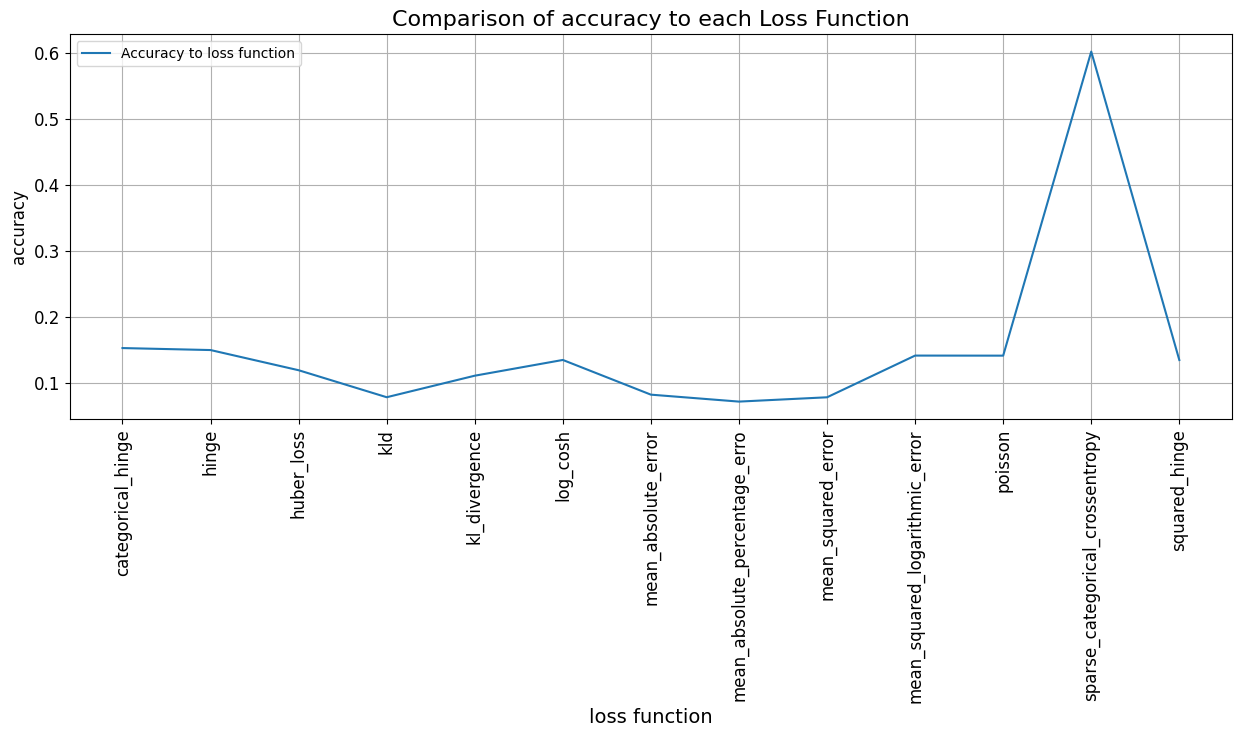

In [ ]:
test_loss = {
  'categorical_hinge' : 0.1523920843998590,
  'hinge' : 0.1493715271353720,
  'huber_loss' : 0.1187761873006820,
  'kld' : 0.1104940101504320,
  'kl_divergence' : 0.0778524825970331,
  'log_cosh' : 0.1343661670883490,
  'mean_absolute_error' : 0.0817499781648318,
  'mean_absolute_percentage_erro' : 0.0712267383933067,
  'mean_squared_error' : 0.0777550439039866,
  'mean_squared_logarithmic_error' : 0.1409919137756020,
  'poisson': 0.1408944750825560,
  'sparse_categorical_crossentropy' : 0.6018707950909930,
  'squared_hinge' : 0.1342687308788290,
}

test_loss2={
  1 : 0.1523920843998590,
  2 : 0.1493715271353720,
  3 : 0.1187761873006820,
  4 : 0.1104940101504320,
  5 : 0.0778524825970331,
  6 : 0.1343661670883490,
  7 : 0.0817499781648318,
  8 : 0.0712267383933067,
  9 : 0.0777550439039866,
  10 : 0.140991913775602,
  11 : 0.140894475082556,
  12 : 0.601870795090993,
  13 : 0.134268730878829
}

fig, ax = plt.subplots(1, 1, figsize=(14, 5) )
plot_df = pd.DataFrame.from_dict({'Accuracy to loss function':test_loss})
plot_df.plot(logy=False, figsize=(15,5), fontsize=12, ax=ax)
plt.xlabel('loss function', fontsize=14 )
ax.set_xticks(range(len(test_loss)))
ax.set_xticklabels(test_loss.keys(), rotation=90)
plt.ylabel('accuracy', fontsize=12)
plt.title('Comparison of accuracy to each Loss Function', fontsize=16)
ax.grid()
# Save the plot
plt.savefig(f'{path_drive}/MLP/fig_comparison_of_loss_functins.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_comparison_of_loss_functins.png', format='png', bbox_inches="tight")
plt.show()

# fig, ax = plt.subplots()
# brazil_dataset.plot('UF', 'Population', ax = ax)
# ax.set_xticks(range(len(brazil_dataset['UF'])))
# ax.set_xticklabels(brazil_dataset['UF'])
# plt.xticks(rotation = 45)
# plt.show()

### historic loss for epoch

In [ ]:
_, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

option= MLP and loss sparse_categorical_crossentropy, n = 1
Epoch 1/30
374/374 [==============================] - 16s 39ms/step - loss: 128.3704 - accuracy: 0.4588 - val_loss: 31.2365 - val_accuracy: 0.4831
Epoch 2/30
374/374 [==============================] - 15s 39ms/step - loss: 10.5093 - accuracy: 0.5990 - val_loss: 5.8034 - val_accuracy: 0.6641
Epoch 3/30
374/374 [==============================] - 22s 58ms/step - loss: 5.5393 - accuracy: 0.6303 - val_loss: 2.1808 - val_accuracy: 0.7366
Epoch 4/30
374/374 [==============================] - 15s 41ms/step - loss: 3.2096 - accuracy: 0.6506 - val_loss: 2.6504 - val_accuracy: 0.6016
Epoch 5/30
374/374 [==============================] - 21s 56ms/step - loss: 1.5770 - accuracy: 0.5727 - val_loss: 1.1152 - val_accuracy: 0.6507
Epoch 6/30
374/374 [==============================] - 14s 38ms/step - loss: 1.0760 - accuracy: 0.6157 - val_loss: 1.0976 - val_accuracy: 0.5952
Epoch 7/30
374/374 [==============================] - 14s 38ms/step - lo

In [ ]:
hist.history['loss']

[126.76886749267578,
 11.088253021240234,
 4.361230373382568,
 2.627876043319702,
 2.036132574081421,
 1.633176565170288,
 1.2834469079971313,
 0.8460273742675781,
 0.8214157819747925,
 0.778366208076477,
 0.7728397250175476,
 0.7869477868080139,
 0.7623682022094727,
 0.7543891072273254,
 0.7517573833465576,
 0.7266290783882141,
 0.716349720954895,
 0.7040789723396301,
 0.705976128578186,
 0.70461106300354,
 0.7081393599510193,
 0.7032378315925598,
 0.6842266917228699,
 0.6767064929008484,
 0.7032752633094788,
 0.6995226144790649,
 0.6897454857826233,
 0.6728561520576477,
 0.668803334236145,
 0.6744480133056641]

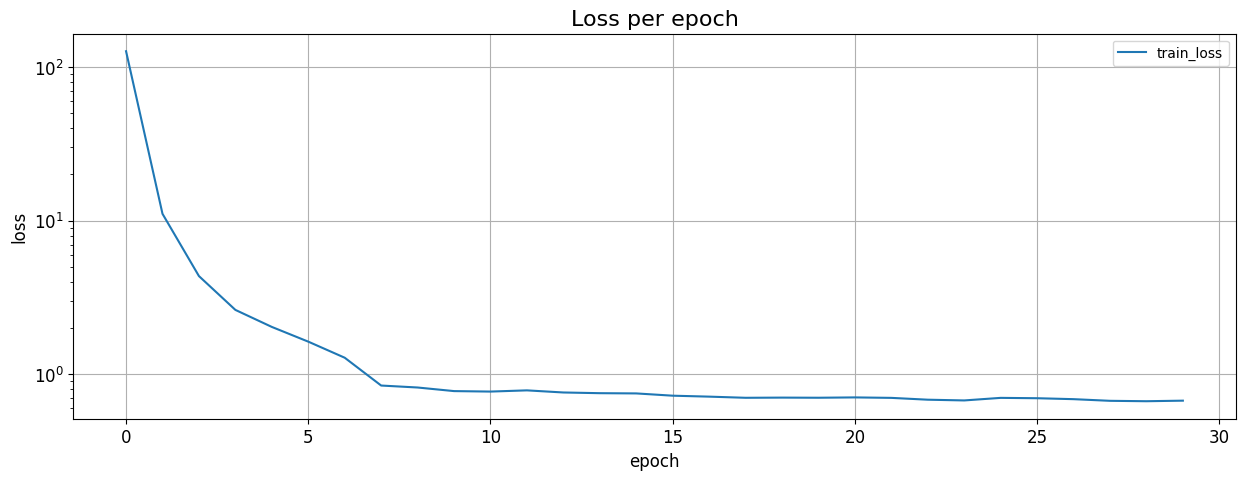

In [ ]:
plot_df = pd.DataFrame.from_dict({'train_loss':hist.history['loss']})
plot_df.plot(logy=True, figsize=(15,5), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.title('Loss per epoch', fontsize=16)
plt.grid()
plt.savefig(f'{path_drive}/MLP/fig_loss_per_epoch.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_loss_per_epoch.png', format='png', bbox_inches="tight")
plt.show()

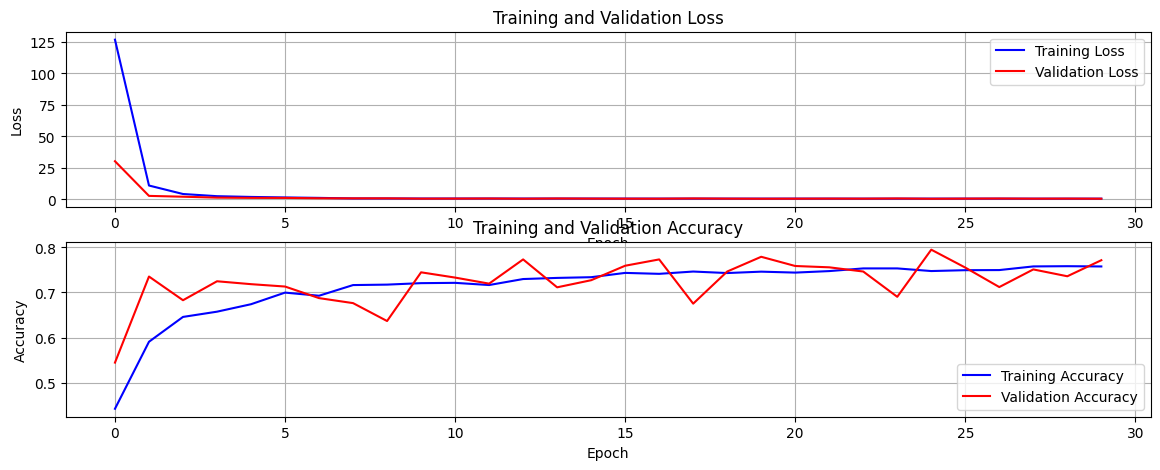

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 5) )

# Plot the first subplot
ax1.plot(hist.history['loss'], color='b', label='Training Loss')
ax1.plot(hist.history['val_loss'], color='r', label='Validation Loss')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid()

# Plot the second subplot
ax2.plot(hist.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(hist.history['val_accuracy'], color='r', label='Validation Accuracy')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Accuracy')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.grid()

# Save the plot
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss.png', format='png', bbox_inches="tight")
plt.show()


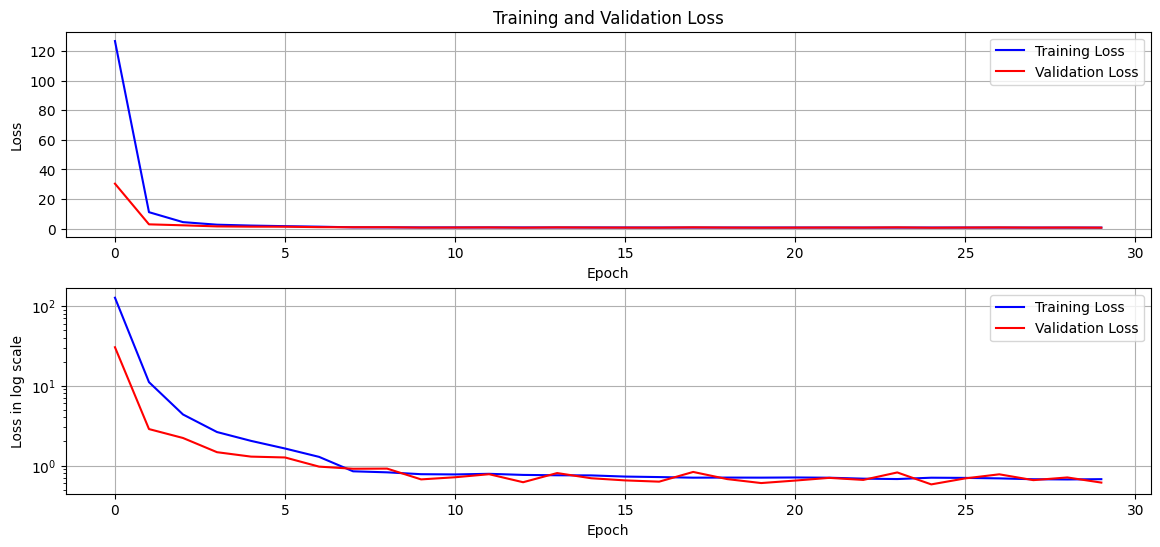

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6), squeeze=True)
fig.subplots_adjust(hspace=0.25)
## first plot
# Plot the first subplot
ax1.plot( hist.history['loss'], color='b', label='Training Loss')
ax1.plot( hist.history['val_loss'], color='r', label='Validation Loss')
# ax1.plot(hist.history['accuracy'], label='Training Accuracy')
# ax1.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax1.legend(loc='best')
ax1.set_title('Training and Validation Loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.grid()

# Plot the second subplot
ax2.plot( hist.history['loss'], color='b', label='Training Loss')
ax2.plot( hist.history['val_loss'], color='r',  label='Validation Loss')
# ax2.plot(hist.history['accuracy'], label='Training Accuracy')
# ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.legend(loc='best')
# ax2.set_title('Training and Validation Loss')
ax2.set_ylabel('Loss in log scale')
ax2.set_xlabel('Epoch')
ax2.set_yscale('log')
ax2.grid()

# Save the plot
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss.png', format='png', bbox_inches="tight")
plt.show()

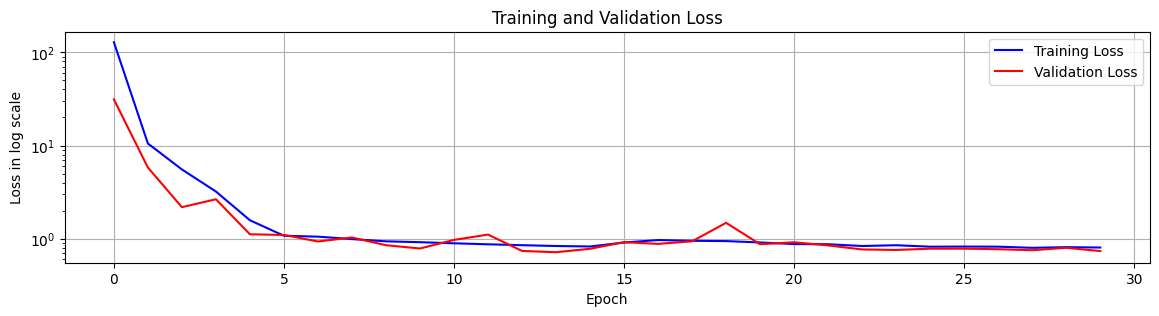

In [ ]:
fig, (ax2) = plt.subplots(1, 1, figsize=(14, 3), squeeze=True)
fig.subplots_adjust(hspace=0.25)
# ## first plot
# # Plot the first subplot
# ax1.plot( hist.history['loss'], color='b', label='Training Loss')
# ax1.plot( hist.history['val_loss'], color='r', label='Validation Loss')
# # ax1.plot(hist.history['accuracy'], label='Training Accuracy')
# # ax1.plot(hist.history['val_accuracy'], label='Validation Accuracy')
# ax1.legend(loc='best')
# ax1.set_title('Training and Validation Loss')
# ax1.set_ylabel('Loss')
# ax1.set_xlabel('Epoch')
# ax1.grid()

# Plot the second subplot
ax2.plot( hist.history['loss'], color='b', label='Training Loss')
ax2.plot( hist.history['val_loss'], color='r',  label='Validation Loss')
# ax2.plot(hist.history['accuracy'], label='Training Accuracy')
# ax2.plot(hist.history['val_accuracy'], label='Validation Accuracy')
ax2.legend(loc='best')
ax2.set_title('Training and Validation Loss')
ax2.set_ylabel('Loss in log scale')
ax2.set_xlabel('Epoch')
ax2.set_yscale('log')
ax2.grid()

# Save the plot
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss_log.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_training_validation_loss_log.png', format='png', bbox_inches="tight")

### example of return explorations

In [ ]:
ret

[2.011505126953125, 0.1949722319841385]

In [ ]:
pred_mlp = ret_model.predict(X_test)

107/107 [==============================] - 1s 11ms/step


In [ ]:
pred_mlp.shape

(3421, 8)

In [ ]:
pred_mlp

array([[0.07838159, 0.18188387, 0.09765599, ..., 0.09204022, 0.19513616,
        0.0995967 ],
       [0.07838159, 0.18188387, 0.09765599, ..., 0.09204022, 0.19513616,
        0.0995967 ],
       [0.07838159, 0.18188387, 0.09765599, ..., 0.09204022, 0.19513616,
        0.0995967 ],
       ...,
       [0.0783816 , 0.18188389, 0.097656  , ..., 0.09204023, 0.19513617,
        0.09959671],
       [0.0783816 , 0.18188389, 0.097656  , ..., 0.09204023, 0.19513617,
        0.09959671],
       [0.0783816 , 0.18188389, 0.097656  , ..., 0.09204023, 0.19513617,
        0.09959671]], dtype=float32)

In [ ]:
y_test[1]

0

In [ ]:
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()

array([6, 6, 6, ..., 6, 6, 6])

In [ ]:
y_test

array([3, 0, 1, ..., 3, 1, 7], dtype=uint8)

In [ ]:
print(y_test.flatten())

[3 0 1 ... 3 1 7]


### Creation of Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_conf_matrix(y_test=[], pred_lr=[], title="Logistic Regression (newton-cg)", show_plot=True, cm=[],  details="" ):
  # Get the confusion matrix
  if len(cm) == 0:
    cm = confusion_matrix(y_test, pred_mlp2.flatten())

  class_names = ['basophil', 'eosinophil', 'erythroblast', 'immature granulocytes', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']

  # Create a heatmap of the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)

  # Add labels and title
  plt.xlabel("Predicted", fontsize=14)
  plt.ylabel("Actual", fontsize=14)
  plt.title(f'Confusion Matrix for {title}', fontsize=16)

  # Save the plot
  plt.savefig(f'{path_drive}/MLP/ConfMatrix/fig_cm_{details}.eps', format='eps', bbox_inches="tight")
  plt.savefig(f'{path_drive}/MLP/ConfMatrix/fig_cm_{details}.png', format='png', bbox_inches="tight")

  # Show the plot
  if show_plot:
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="" )

NameError: name 'ret_model' is not defined

### To organize the output data

In [ ]:
from prettytable import PrettyTable

table1 = PrettyTable(["Unit per layer", "drop out", "batch", "epochs", "loss", "accuracy"])

listLayers = [64, 128, 256, 512, 1024, 2048]
listDropout = [0]
listBatch= [16, 32, 64, 128]
listEpochs= [5]


list_acc = []
list_loss = []
list_ret = []
list_ret_model = []
list_ret_hist = []
list_cm = []          ## confusion matrix

# _, _m, hist = setup_MLP_model(1024, 0, 32, 30, 1, "MLP", 'sparse_categorical_crossentropy')

for l in listLayers:
  for d in listDropout:
    for b in listBatch:
      for e in listEpochs:
        lossSum = 0
        accuracySum = 0
        for n in range(0,3,1):            ### apply to get the average of three interations
          ret, ret_model, ret_hist = setup_MLP_model(l, d, b, e, n, "MLP", 'sparse_categorical_crossentropy')
          lossSum += ret[0]
          accuracySum += ret[1]

          list_ret_model.append(ret_model)
          list_ret_hist.append(ret_hist)
          list_ret.append(ret)
          list_cm.append(confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten()))

        list_acc.append(accuracySum/3)
        list_loss.append(lossSum/3)

      table1.add_row([l, d, b, e, lossSum/3, accuracySum/3])

option= MLP and loss sparse_categorical_crossentropy, n = 0
Epoch 1/5
748/748 [==============================] - 4s 4ms/step - loss: 10.2667 - accuracy: 0.1871 - val_loss: 2.0211 - val_accuracy: 0.1951
Epoch 2/5
748/748 [==============================] - 4s 6ms/step - loss: 2.0119 - accuracy: 0.1948 - val_loss: 2.0058 - val_accuracy: 0.1951
Epoch 3/5
748/748 [==============================] - 4s 5ms/step - loss: 2.0046 - accuracy: 0.1948 - val_loss: 2.0033 - val_accuracy: 0.1951
Epoch 4/5
748/748 [==============================] - 3s 4ms/step - loss: 2.0034 - accuracy: 0.1948 - val_loss: 2.0029 - val_accuracy: 0.1951
Epoch 5/5
748/748 [==============================] - 3s 4ms/step - loss: 2.0031 - accuracy: 0.1948 - val_loss: 2.0029 - val_accuracy: 0.1951
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                

In [ ]:
print(table1)

+----------------+----------+-------+--------+--------------------+---------------------+
| Unit per layer | drop out | batch | epochs |        loss        |       accuracy      |
+----------------+----------+-------+--------+--------------------+---------------------+
|       64       |    0     |   16  |   5    | 2.0029871463775635 | 0.19477735459804535 |
|       64       |    0     |   32  |   5    | 2.017618179321289  | 0.19477735459804535 |
|       64       |    0     |   64  |   5    | 1.8236864805221558 |  0.2814966340859731 |
|       64       |    0     |  128  |   5    | 2.629890521367391  |  0.2913378179073334 |
|      128       |    0     |   16  |   5    | 2.0033796628316245 | 0.19467991590499878 |
|      128       |    0     |   32  |   5    | 1.9071964025497437 | 0.23891649643580118 |
|      128       |    0     |   64  |   5    | 4.022717118263245  |  0.5301568806171417 |
|      128       |    0     |  128  |   5    | 14.10187848409017  |  0.5302543143431345 |
|      256

In [ ]:
with open(f'{path_drive}/test.csv', 'w', newline='') as f_output:
  f_output.write(table1.get_csv_string())

In [ ]:
for i in range(0, len(list_ret_model), 4):
  print(i)

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68


In [ ]:
ret_per_batch = {
    16: [],
    32: [],
    64: [],
    128: []
}
for i in range(0, len(list_acc), 4):
  ret_per_batch[listBatch[0]].append([list_loss[i], list_acc[i] ])
  ret_per_batch[listBatch[1]].append([list_loss[i+1], list_acc[i+1]])
  ret_per_batch[listBatch[2]].append([list_loss[i+2], list_acc[i+2]])
  ret_per_batch[listBatch[3]].append([list_loss[i+3], list_acc[i+3]])

In [ ]:
len(list_ret)

72

In [ ]:
len(ret_per_batch[16])

6

In [ ]:
ret_per_batch[32]

[[2.017618179321289, 0.19477735459804535],
 [1.9071964025497437, 0.23891649643580118],
 [1.2604161898295085, 0.5861833790938059],
 [1.3108468850453694, 0.49917178352673847],
 [0.9554508725802103, 0.6717333992322286],
 [0.8860839207967123, 0.6958978772163391]]

In [ ]:
plt.title('No of Datapoints per class', fontsize=15)
sns.countplot(a)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('No of Datapoints', fontsize=15)
plt.xticks()
plt.savefig(f'{path_drive}/NDatapointsPerClass.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/NDatapointsPerClass.png', format='png', bbox_inches="tight")
plt.show()

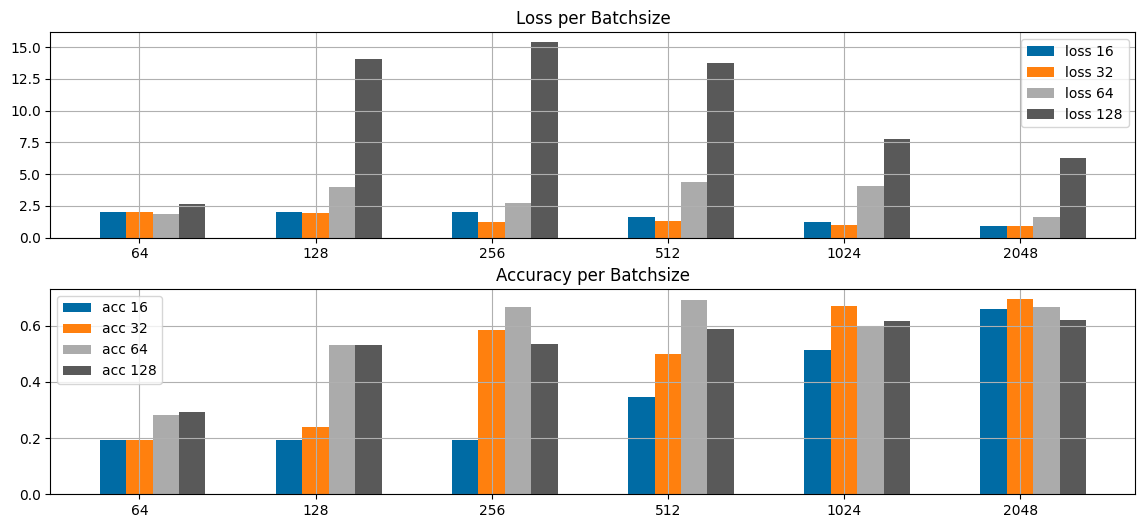

In [ ]:
# prompt: gostaria de plotar graficos em barra que apresente ret_per_batch conforme os agrupamentos

import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 6))
fig.subplots_adjust(hspace=0.25)

# Set the width of bars
bar_width = 0.15

# Get positions for each bar
r1 = range(len(ret_per_batch[16]))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bars
ax1.bar(r1, [x[0] for x in ret_per_batch[16]], width=bar_width, label='loss 16')
ax1.bar(r2, [x[0] for x in ret_per_batch[32]], width=bar_width, label='loss 32')
ax1.bar(r3, [x[0] for x in ret_per_batch[64]], width=bar_width, label='loss 64')
ax1.bar(r4, [x[0] for x in ret_per_batch[128]], width=bar_width, label='loss 128')
# Add x-axis labels
# ax1.xlabel( 'Batchsize', fontsize=14)
# ax1.ylabel( 'Loss', fontsize=14)
ax1.set_xticks([x + bar_width for x in r1])
ax1.set_xticklabels([ '64', '128', '256', '512', '1024', '2048'])
ax1.legend()
ax1.grid()
ax1.title.set_text('Loss per Batchsize')

# # Create bars
ax2.bar(r1, [x[1] for x in ret_per_batch[16]], width=bar_width, label='acc 16')
ax2.bar(r2, [x[1] for x in ret_per_batch[32]], width=bar_width, label='acc 32')
ax2.bar(r3, [x[1] for x in ret_per_batch[64]], width=bar_width, label='acc 64')
ax2.bar(r4, [x[1] for x in ret_per_batch[128]], width=bar_width, label='acc 128')
# Add x-axis labels
# ax2.xlabel( 'Batchsize', fontsize=14)
# ax2.ylabel( 'Accuracy', fontsize=14)
ax2.set_xticks([x + bar_width for x in r1])
ax2.set_xticklabels([ '64', '128', '256', '512', '1024', '2048'])
ax2.legend()
ax2.grid()
ax2.title.set_text('Accuracy per Batchsize')
# Show plot

# plt.xlabel('Batchsize', fontsize=15)
# plt.ylabel('Loss', fontsize=15)

plt.savefig(f'{path_drive}/MLP/fig_units_per_batchsize.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_units_per_batchsize.png', format='png', bbox_inches="tight")
plt.show()


option= MLP and loss sparse_categorical_crossentropy, n = 1
Epoch 1/5
187/187 [==============================] - 7s 30ms/step - loss: 141.0159 - accuracy: 0.3589 - val_loss: 6.6199 - val_accuracy: 0.5368
Epoch 2/5
187/187 [==============================] - 5s 29ms/step - loss: 7.3481 - accuracy: 0.5305 - val_loss: 12.7453 - val_accuracy: 0.4346
Epoch 3/5
187/187 [==============================] - 7s 36ms/step - loss: 3.9544 - accuracy: 0.6053 - val_loss: 2.5194 - val_accuracy: 0.6314
Epoch 4/5
187/187 [==============================] - 5s 25ms/step - loss: 2.3793 - accuracy: 0.5897 - val_loss: 1.4260 - val_accuracy: 0.5987
Epoch 5/5
187/187 [==============================] - 6s 32ms/step - loss: 1.4575 - accuracy: 0.5847 - val_loss: 1.3743 - val_accuracy: 0.5870
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2352)              0         
       

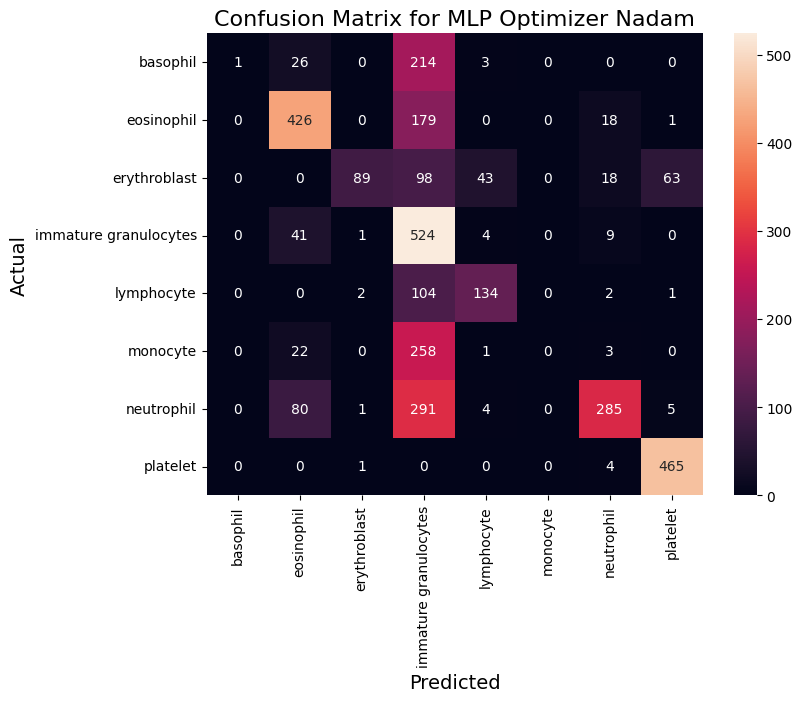

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(512, 0, 64, 5, 1, "MLP", 'sparse_categorical_crossentropy')
cm2=confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())
plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                  f"MLP Optimizer Nadam", show_plot=False, cm=cm2,
                  details=f"_units_512_epoch_5_batch_size_64_n_test_0_optimizer_Nadam")

option= MLP and loss Adam, n = 2
Epoch 1/5
187/187 [==============================] - 10s 47ms/step - loss: 245.6127 - accuracy: 0.4012 - val_loss: 17.6811 - val_accuracy: 0.4690
Epoch 2/5
187/187 [==============================] - 5s 25ms/step - loss: 15.3539 - accuracy: 0.5235 - val_loss: 14.2669 - val_accuracy: 0.4959
Epoch 3/5
187/187 [==============================] - 4s 23ms/step - loss: 9.0631 - accuracy: 0.5773 - val_loss: 10.2067 - val_accuracy: 0.5362
Epoch 4/5
187/187 [==============================] - 6s 32ms/step - loss: 6.7989 - accuracy: 0.5944 - val_loss: 7.9951 - val_accuracy: 0.4685
Epoch 5/5
187/187 [==============================] - 5s 25ms/step - loss: 4.5409 - accuracy: 0.5681 - val_loss: 2.3801 - val_accuracy: 0.6414
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2352)              0         
                              

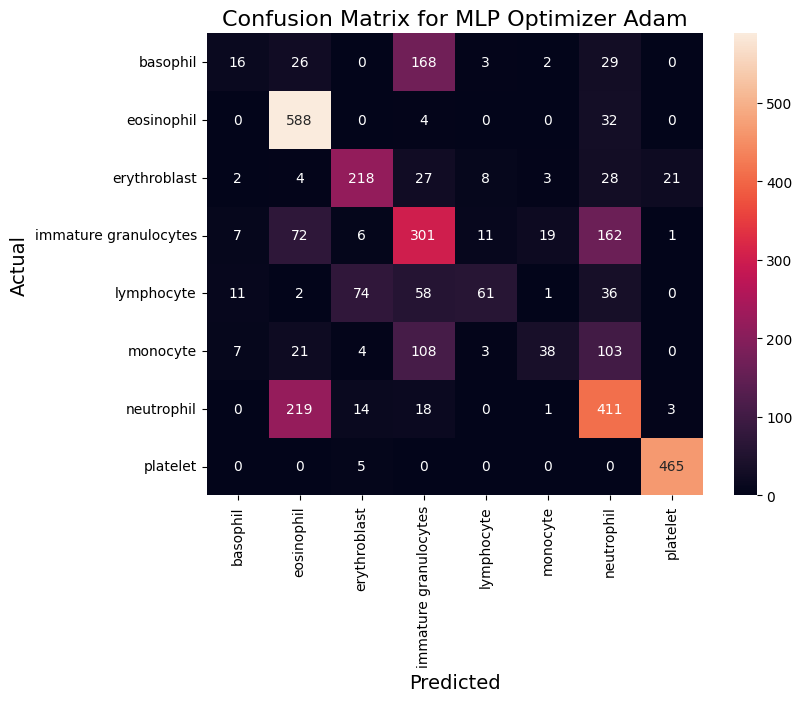

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(512, 0, 64, 5, 2, "MLP", 'Adam')
cm2=confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())
plot_conf_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten(),
                  f"MLP Optimizer Adam", show_plot=False, cm=cm2,
                  details=f"_units_512_epoch_5_batch_size_64_n_test_0_optimizer_Adam")

In [ ]:
confusion_matrix(y_test.flatten(), np.argmax(ret_model.predict(X_test), axis = 1).flatten())

107/107 [==============================] - 1s 6ms/step


array([[113,   6,   0,  79,   0,  43,   3,   0],
       [ 42, 466,   2,  50,   3,   8,  52,   1],
       [  4,   0, 175,   6,   9,  23,  16,  78],
       [ 44,  19,   8, 260,  15, 198,  33,   2],
       [ 31,   3,  31,  21, 115,  12,  16,  14],
       [  4,   1,   1,  91,   2, 180,   5,   0],
       [  0,  45,  17,  54,  28,  15, 497,  10],
       [  0,   0,   1,   0,   0,   0,   0, 469]])

107/107 [==============================] - 1s 10ms/step
[[ 29  70   1  82  32  20  10   0]
 [  0 492   5   3   3   1 119   1]
 [  1   3 208  16  28   5  31  19]
 [  2 110  12 171  24  99 161   0]
 [  0   3  15   3 197   2  23   0]
 [  0  36   0  52   1 125  70   0]
 [  0  11  23   2  10   1 616   3]
 [  0   0   3   0   0   0   1 466]]


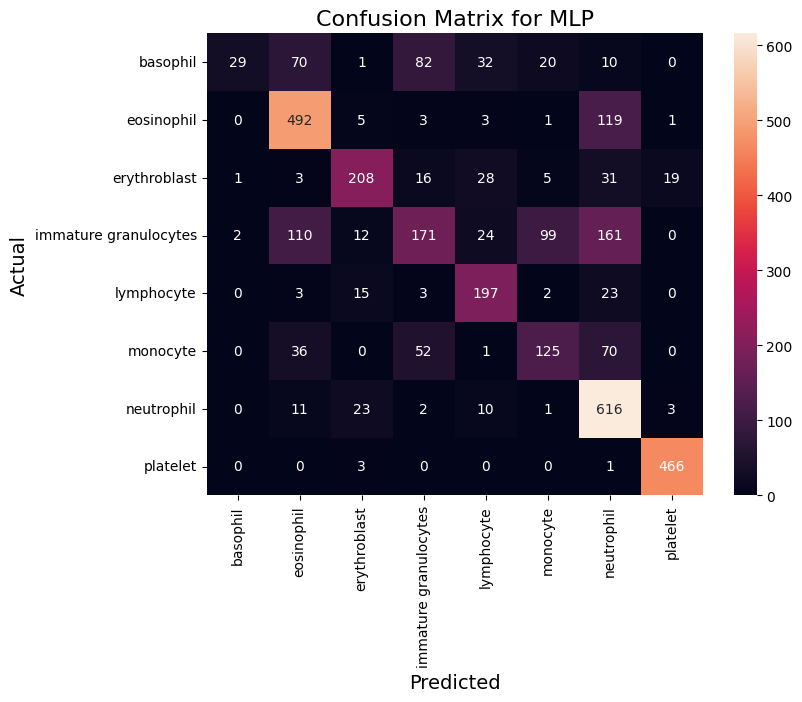

In [ ]:
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_512_batch_64_epoch_5" )

option= MLP and loss sparse_categorical_crossentropy, n = 1
Epoch 1/15
187/187 [==============================] - 7s 30ms/step - loss: 128.1906 - accuracy: 0.3982 - val_loss: 28.1313 - val_accuracy: 0.4416
Epoch 2/15
187/187 [==============================] - 4s 20ms/step - loss: 17.8092 - accuracy: 0.5455 - val_loss: 10.0056 - val_accuracy: 0.6857
Epoch 3/15
187/187 [==============================] - 8s 42ms/step - loss: 12.1043 - accuracy: 0.5976 - val_loss: 10.2111 - val_accuracy: 0.5619
Epoch 4/15
187/187 [==============================] - 7s 38ms/step - loss: 9.1147 - accuracy: 0.6174 - val_loss: 3.4269 - val_accuracy: 0.7336
Epoch 5/15
187/187 [==============================] - 4s 21ms/step - loss: 6.6095 - accuracy: 0.6507 - val_loss: 6.9578 - val_accuracy: 0.5806
Epoch 6/15
187/187 [==============================] - 4s 22ms/step - loss: 4.9674 - accuracy: 0.6695 - val_loss: 3.1502 - val_accuracy: 0.6998
Epoch 7/15
187/187 [==============================] - 5s 28ms/step - loss: 

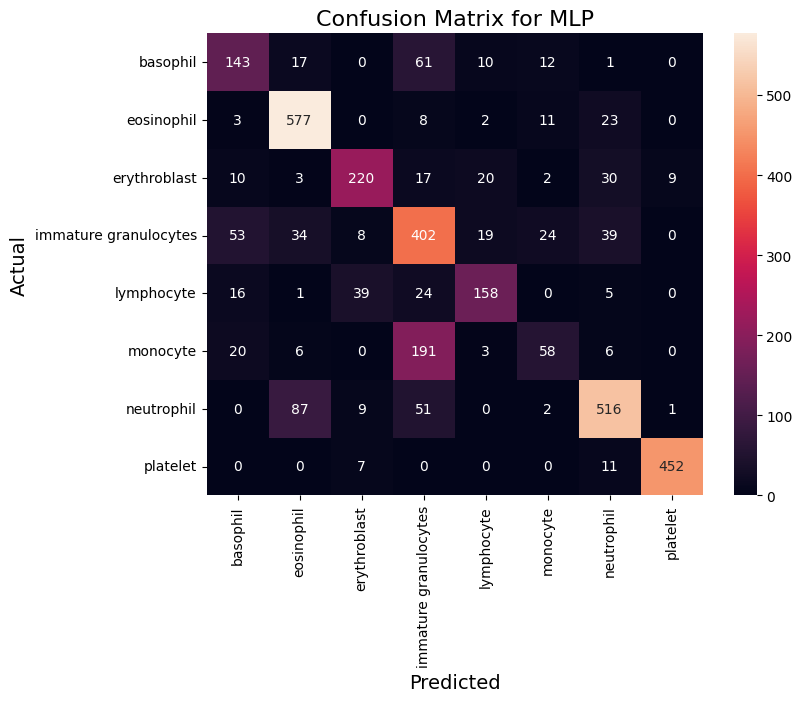

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(512, 0, 64, 15, 1, "MLP", 'sparse_categorical_crossentropy')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_512_batch_64_epoch_15" )

option= MLP and loss Adam, n = 2
Epoch 1/5
187/187 [==============================] - 7s 26ms/step - loss: 266.7540 - accuracy: 0.4127 - val_loss: 26.4071 - val_accuracy: 0.5345
Epoch 2/5
187/187 [==============================] - 4s 19ms/step - loss: 31.5248 - accuracy: 0.5428 - val_loss: 16.5584 - val_accuracy: 0.6992
Epoch 3/5
187/187 [==============================] - 3s 18ms/step - loss: 18.1108 - accuracy: 0.6205 - val_loss: 32.3052 - val_accuracy: 0.4574
Epoch 4/5
187/187 [==============================] - 4s 22ms/step - loss: 16.9097 - accuracy: 0.6004 - val_loss: 23.3109 - val_accuracy: 0.4445
Epoch 5/5
187/187 [==============================] - 5s 24ms/step - loss: 15.4112 - accuracy: 0.5677 - val_loss: 7.8413 - val_accuracy: 0.5140
Model: "sequential_126"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_126 (Flatten)       (None, 2352)              0         
                         

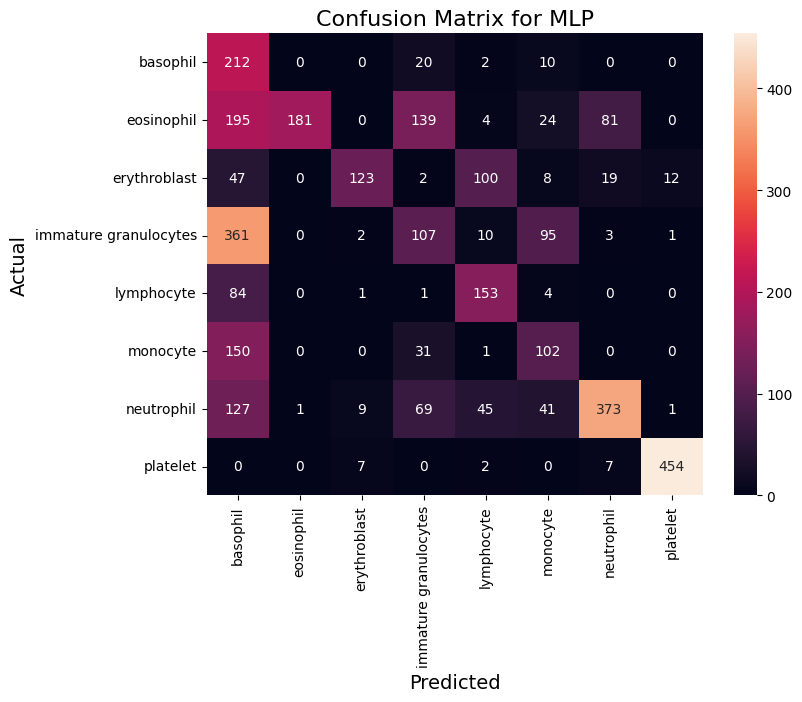

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(512, 0, 64, 5, 2, "MLP", 'Adam')

pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_512_batch_64_epoch_5_optimizer_Adam" )

### test Optimizer

In [ ]:
list_optimizer = [
  'Adadelta',
  # 'Adafactor',  ## not working customize parameter
  'Adagrad',
  'Adam',
  # 'AdamW',      ## not working customize parameter
  'Adamax',
  'Ftrl',
  # 'Lion',        ## not work without internal parameters
  # 'LossScaleOptimizer',  ## not work without internal parameters
  'Nadam',
  'RMSprop',
  'SGD'
  ]

len(list_optimizer)

8

In [ ]:
ret, ret_model, hist = setup_MLP_model(512, 0, 64, 5, 2, "MLP", 'SGD')

In [ ]:
from prettytable import PrettyTable

table3 = PrettyTable(["units of MLP", "drop out", "batch", "epochs", "optimizer algorithm", "loss", "accuracy", "n"])
table4 = PrettyTable(["units of MLP", "drop out", "batch", "epochs", "optimizer algorithm", "loss", "accuracy", "n"])

for item in list_optimizer:
  lossSum = 0
  accuracySum = 0
  for n in range(0,3,1):            ### apply to get the average of three interations
    ret, ret_model, hist = setup_MLP_model(512, 0, 64, 5, 2, "MLP", item)
    table3.add_row([512, 0, 64, 5, item, ret[0], ret[1], f'n = {n}'])
    lossSum += ret[0]
    accuracySum += ret[1]

  table4.add_row([512, 0, 64, 5, item, lossSum/3, accuracySum/3, 'avg 1-3'] )


with open(f'{path_drive}/MLP/Unit_512_batch_64_optimizer_tests_individual.csv', 'w', newline='') as f_output:
  f_output.write(table3.get_csv_string())

with open(f'{path_drive}/MLP/Unit_512_batch_64_optimizer_avg.csv', 'w', newline='') as f_output:
  f_output.write(table4.get_csv_string())


print(table3)

option= MLP and loss Adadelta, n = 2
Epoch 1/5
187/187 [==============================] - 5s 21ms/step - loss: 84.8399 - accuracy: 0.2141 - val_loss: 40.7069 - val_accuracy: 0.3113
Epoch 2/5
187/187 [==============================] - 4s 21ms/step - loss: 36.2879 - accuracy: 0.3045 - val_loss: 31.8080 - val_accuracy: 0.3487
Epoch 3/5
187/187 [==============================] - 5s 28ms/step - loss: 29.3974 - accuracy: 0.3482 - val_loss: 26.8760 - val_accuracy: 0.3756
Epoch 4/5
187/187 [==============================] - 4s 23ms/step - loss: 25.2530 - accuracy: 0.3789 - val_loss: 23.9836 - val_accuracy: 0.3931
Epoch 5/5
187/187 [==============================] - 4s 21ms/step - loss: 22.6137 - accuracy: 0.4021 - val_loss: 21.8685 - val_accuracy: 0.4118
Model: "sequential_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_88 (Flatten)        (None, 2352)              0         
                      

In [ ]:
print(table4)

+--------------+----------+-------+--------+---------------------+--------------------+---------------------+---------+
| units of MLP | drop out | batch | epochs | optimizer algorithm |        loss        |       accuracy      |    n    |
+--------------+----------+-------+--------+---------------------+--------------------+---------------------+---------+
|     512      |    0     |   64  |   5    |       Adadelta      | 22.36425526936849  |  0.4055344561735789 | avg 1-3 |
|     512      |    0     |   64  |   5    |       Adagrad       | 9.310365200042725  |  0.5896911223729452 | avg 1-3 |
|     512      |    0     |   64  |   5    |         Adam        | 4.305707216262817  |  0.655363917350769  | avg 1-3 |
|     512      |    0     |   64  |   5    |        Adamax       |  8.16224463780721  |  0.6320763826370239 | avg 1-3 |
|     512      |    0     |   64  |   5    |         Ftrl        |  6.39903195699056  |  0.5662087202072144 | avg 1-3 |
|     512      |    0     |   64  |   5 

option= MLP and loss Adam, n = 2
Epoch 1/15
187/187 [==============================] - 4s 19ms/step - loss: 206.4304 - accuracy: 0.4043 - val_loss: 9.5466 - val_accuracy: 0.4994
Epoch 2/15
187/187 [==============================] - 5s 24ms/step - loss: 9.8348 - accuracy: 0.5728 - val_loss: 9.3911 - val_accuracy: 0.5426
Epoch 3/15
187/187 [==============================] - 4s 21ms/step - loss: 11.5340 - accuracy: 0.5532 - val_loss: 5.7889 - val_accuracy: 0.6320
Epoch 4/15
187/187 [==============================] - 3s 18ms/step - loss: 6.1485 - accuracy: 0.6166 - val_loss: 3.9031 - val_accuracy: 0.6449
Epoch 5/15
187/187 [==============================] - 3s 18ms/step - loss: 4.1063 - accuracy: 0.6382 - val_loss: 3.0912 - val_accuracy: 0.6618
Epoch 6/15
187/187 [==============================] - 5s 24ms/step - loss: 3.2439 - accuracy: 0.6195 - val_loss: 2.3751 - val_accuracy: 0.6863
Epoch 7/15
187/187 [==============================] - 6s 30ms/step - loss: 2.1748 - accuracy: 0.6194 - val

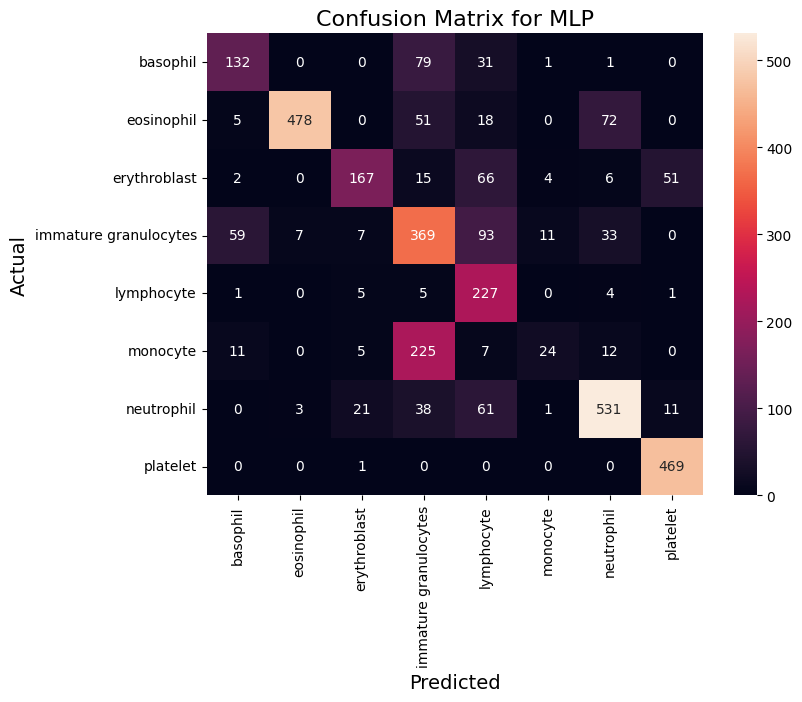

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(512, 0, 64, 15, 2, "MLP", 'Adam')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_512_batch_64_epoch_15_optimizer_Adam" )

option= MLP and loss Adam, n = 2
Epoch 1/5
187/187 [==============================] - 8s 39ms/step - loss: 302.3230 - accuracy: 0.3121 - val_loss: 12.9762 - val_accuracy: 0.4264
Epoch 2/5
187/187 [==============================] - 7s 38ms/step - loss: 8.1429 - accuracy: 0.5160 - val_loss: 11.0770 - val_accuracy: 0.5502
Epoch 3/5
187/187 [==============================] - 7s 40ms/step - loss: 4.5936 - accuracy: 0.5867 - val_loss: 4.2133 - val_accuracy: 0.5380
Epoch 4/5
187/187 [==============================] - 7s 37ms/step - loss: 3.6121 - accuracy: 0.5993 - val_loss: 2.3676 - val_accuracy: 0.6700
Epoch 5/5
187/187 [==============================] - 8s 42ms/step - loss: 2.4372 - accuracy: 0.6412 - val_loss: 2.1230 - val_accuracy: 0.6402
Model: "sequential_128"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_128 (Flatten)       (None, 2352)              0         
                               

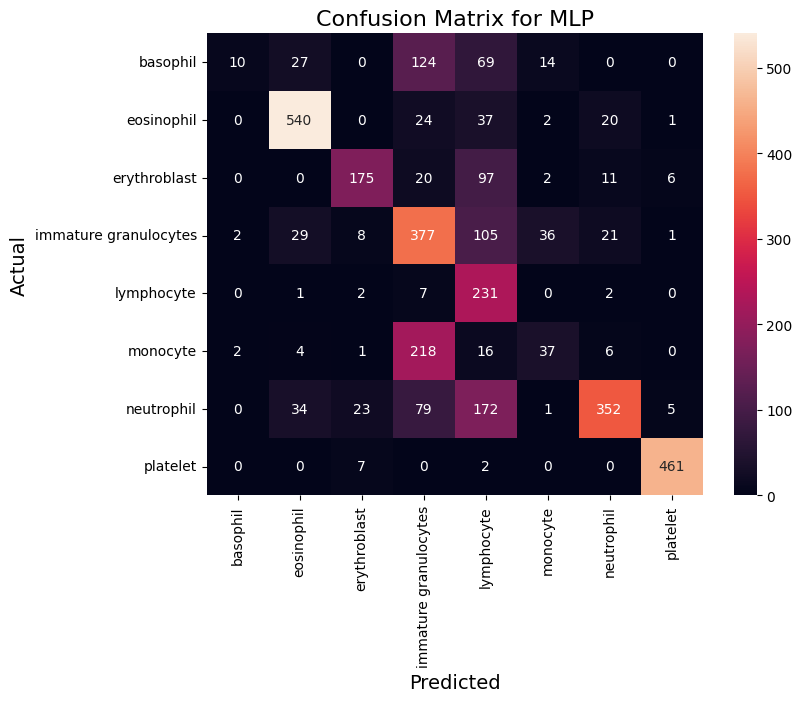

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(1024, 0, 64, 5, 2, "MLP", 'Adam')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_1024_batch_64_epoch_5_optimizer_Adam" )

option= MLP and loss Adam, n = 2
Epoch 1/15
187/187 [==============================] - 9s 45ms/step - loss: 216.3214 - accuracy: 0.3969 - val_loss: 18.2802 - val_accuracy: 0.5275
Epoch 2/15
187/187 [==============================] - 7s 35ms/step - loss: 11.8663 - accuracy: 0.5571 - val_loss: 6.1547 - val_accuracy: 0.6238
Epoch 3/15
187/187 [==============================] - 8s 44ms/step - loss: 5.7834 - accuracy: 0.6160 - val_loss: 4.6234 - val_accuracy: 0.6186
Epoch 4/15
187/187 [==============================] - 6s 35ms/step - loss: 4.4920 - accuracy: 0.6046 - val_loss: 2.7356 - val_accuracy: 0.6817
Epoch 5/15
187/187 [==============================] - 8s 43ms/step - loss: 3.3048 - accuracy: 0.6297 - val_loss: 1.6922 - val_accuracy: 0.7272
Epoch 6/15
187/187 [==============================] - 7s 35ms/step - loss: 2.0590 - accuracy: 0.6645 - val_loss: 1.8106 - val_accuracy: 0.7155
Epoch 7/15
187/187 [==============================] - 8s 42ms/step - loss: 1.7069 - accuracy: 0.6822 - va

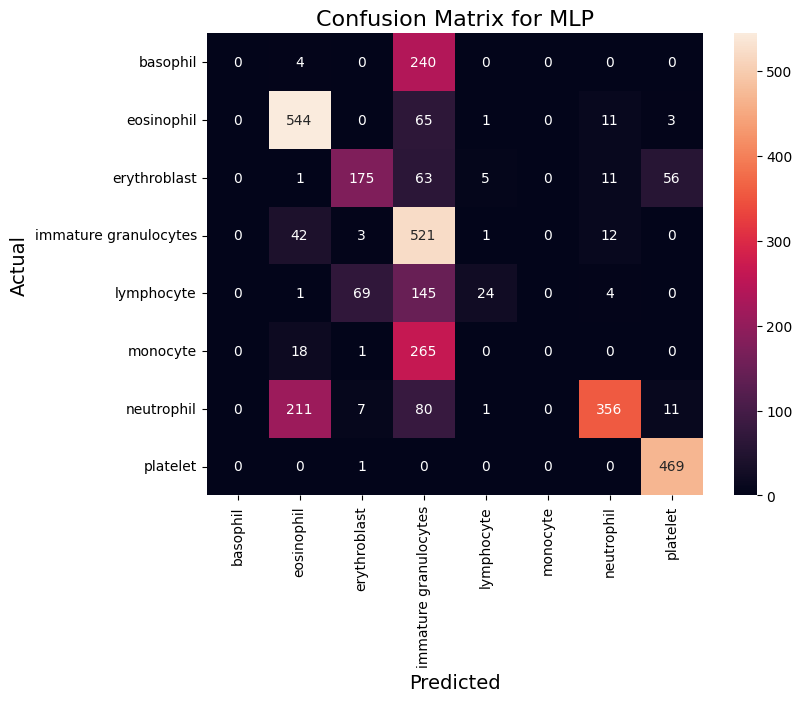

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(1024, 0, 64, 15, 2, "MLP", 'Adam')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_1024_batch_64_epoch_15_optimizer_Adam" )

option= MLP and loss Adam, n = 2
Epoch 1/5
187/187 [==============================] - 15s 79ms/step - loss: 296.6008 - accuracy: 0.3974 - val_loss: 12.2318 - val_accuracy: 0.6139
Epoch 2/5
187/187 [==============================] - 15s 78ms/step - loss: 13.2008 - accuracy: 0.5511 - val_loss: 4.6521 - val_accuracy: 0.6320
Epoch 3/5
187/187 [==============================] - 14s 77ms/step - loss: 6.5808 - accuracy: 0.6202 - val_loss: 2.0861 - val_accuracy: 0.7196
Epoch 4/5
187/187 [==============================] - 14s 77ms/step - loss: 3.2666 - accuracy: 0.6386 - val_loss: 2.9154 - val_accuracy: 0.6536
Epoch 5/5
187/187 [==============================] - 14s 78ms/step - loss: 2.7714 - accuracy: 0.6198 - val_loss: 1.2651 - val_accuracy: 0.7225
Model: "sequential_130"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_130 (Flatten)       (None, 2352)              0         
                          

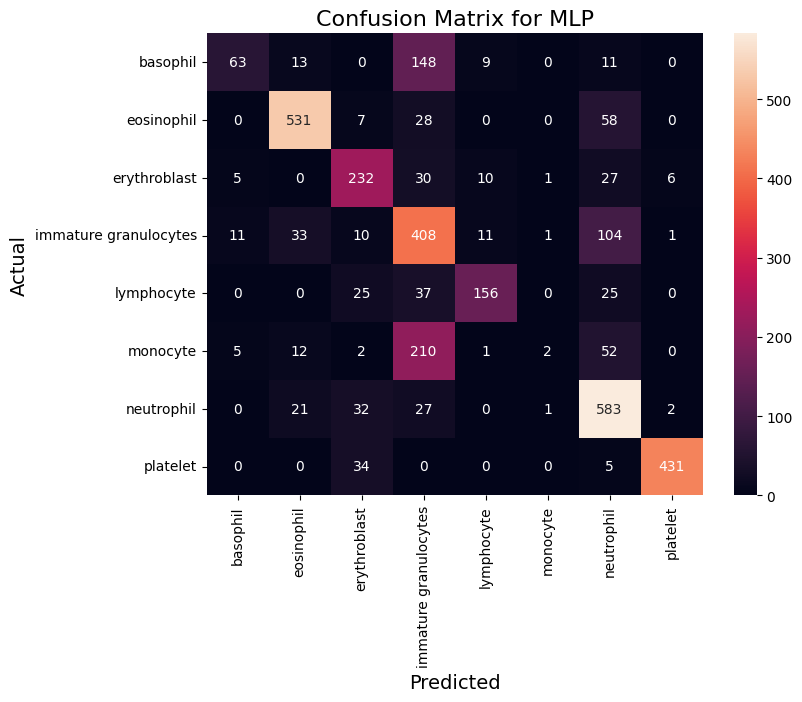

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(2048, 0, 64, 5, 2, "MLP", 'Adam')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_2048_batch_64_epoch_5_optimizer_Adam" )

option= MLP and loss Adam, n = 2
Epoch 1/100
187/187 [==============================] - 16s 78ms/step - loss: 368.4261 - accuracy: 0.4153 - val_loss: 11.2276 - val_accuracy: 0.5789
Epoch 2/100
187/187 [==============================] - 14s 76ms/step - loss: 12.4877 - accuracy: 0.5579 - val_loss: 10.6563 - val_accuracy: 0.4918
Epoch 3/100
187/187 [==============================] - 14s 77ms/step - loss: 5.3700 - accuracy: 0.6011 - val_loss: 3.8924 - val_accuracy: 0.5275
Epoch 4/100
187/187 [==============================] - 14s 77ms/step - loss: 3.1143 - accuracy: 0.6137 - val_loss: 3.1830 - val_accuracy: 0.5164
Epoch 5/100
187/187 [==============================] - 15s 82ms/step - loss: 1.8076 - accuracy: 0.6120 - val_loss: 1.5626 - val_accuracy: 0.5432
Epoch 6/100
187/187 [==============================] - 15s 79ms/step - loss: 1.1276 - accuracy: 0.6793 - val_loss: 0.8263 - val_accuracy: 0.7453
Epoch 7/100
187/187 [==============================] - 16s 84ms/step - loss: 1.0351 - accura

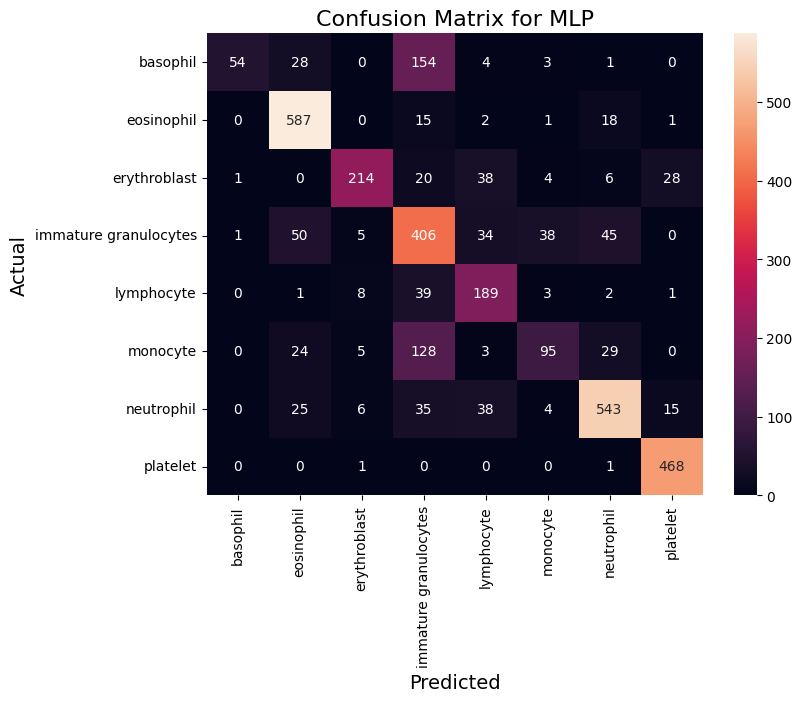

In [ ]:
ret, ret_model, ret_hist = setup_MLP_model(2048, 0, 64, 100, 2, "MLP", 'Adam')
from sklearn.metrics import confusion_matrix
pred_mlp = ret_model.predict(X_test)
pred_mlp2 = np.argmax(pred_mlp, axis = 1)
pred_mlp2.flatten()
cm2= confusion_matrix(y_test.flatten(), pred_mlp2.flatten())
print(cm2)
plot_conf_matrix(y_test, pred_mlp2.flatten(), "MLP", show_plot=False, cm=cm2, details="units_2048_batch_64_epoch_100_optimizer_Adam" )

## Ultimos testes e plots

   units of MLP  drop out  batch  epochs optimizer algorithm       loss  \
0           512         0     64       5            Adadelta  22.364255   
1           512         0     64       5             Adagrad   9.310365   
2           512         0     64       5                Adam   4.305707   
3           512         0     64       5              Adamax   8.162245   
4           512         0     64       5                Ftrl   6.399032   
5           512         0     64       5               Nadam   6.066433   
6           512         0     64       5             RMSprop   1.935532   
7           512         0     64       5                 SGD   2.011331   

   accuracy        n  
0  0.405534  avg 1-3  
1  0.589691  avg 1-3  
2  0.655364  avg 1-3  
3  0.632076  avg 1-3  
4  0.566209  avg 1-3  
5  0.390139  avg 1-3  
6  0.239988  avg 1-3  
7  0.194582  avg 1-3  


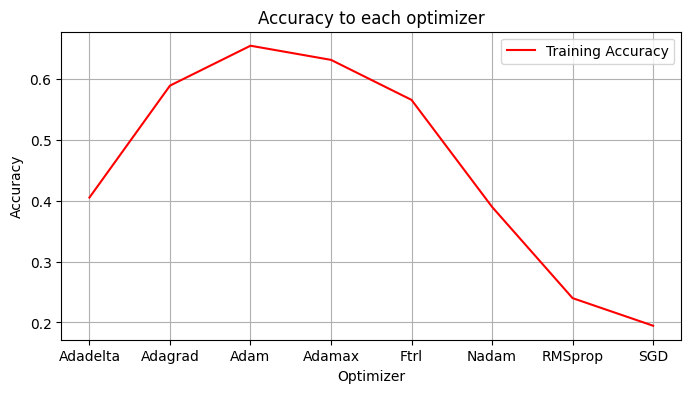

In [ ]:
df= pd.read_csv(f'{path_drive}/MLP/Unit_512_batch_64_optimizer_avg.csv')
print(df)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

# ax.plot(df['optimizer algorithm'], df['loss'], color='b', label='Training Loss')
ax.plot(df['optimizer algorithm'], df['accuracy'], color='r', label='Training Accuracy')
ax.legend(loc='best')
ax.set_title('Accuracy to each optimizer')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Optimizer')
ax.grid()

plt.savefig(f'{path_drive}/MLP/fig_comparison_optimizer.eps', format='eps', bbox_inches="tight")
plt.savefig(f'{path_drive}/MLP/fig_comparison_optimizer.png', format='png', bbox_inches="tight")

plt.show()